In [1]:
# Install the necessary dependencies
!pip install torch torchvision
!pip install git+https://github.com/ultralytics/yolov5.git

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: nb-black 1.0.7 has a non-standard dependency specifier black>='19.3'; python_version >= "3.6". pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of nb-black or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/ultralytics/yolov5.git to c:\users\z_tja\appdata\local\temp\pip-req-build-7_du282z
  Resolved https://github.com/ultralytics/yolov5.git to commit e62a31b601641c5b967226b6b4c44aaee23f99ae
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/yolov5.git 'C:\Users\z_tja\AppData\Local\Temp\pip-req-build-7_du282z'
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [14 lines of output]
      error: Multiple top-level packages discovered in a flat-layout: ['data', 'models', 'segment', 'classify'].
      
      To avoid accidental inclusion of unwanted files or directories,
      setuptools will not proceed with this build.
      
      If you are trying to create a single distribution with multiple packages
      on purpose, you should not rely on automatic discovery.
      Instead, consider the following options:
      
      1. set up custom discovery (`find` directive with `include` or `exclude`)
      2. use a `src-layout`
      3. explicitly set `py_modules` or `packages` with a list of names
      
      To find more information, look for "package discovery" on

Using cache found in C:\Users\z_tja/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-12-9 Python-3.10.8 torch-2.5.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
C:\Users\z_tja/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 1570x1586 1 person, 1 truck, 1 fire hydrant
Speed: 74.3ms pre-process, 349.0ms inference, 31.0ms NMS per image at shape (1, 3, 640, 640)


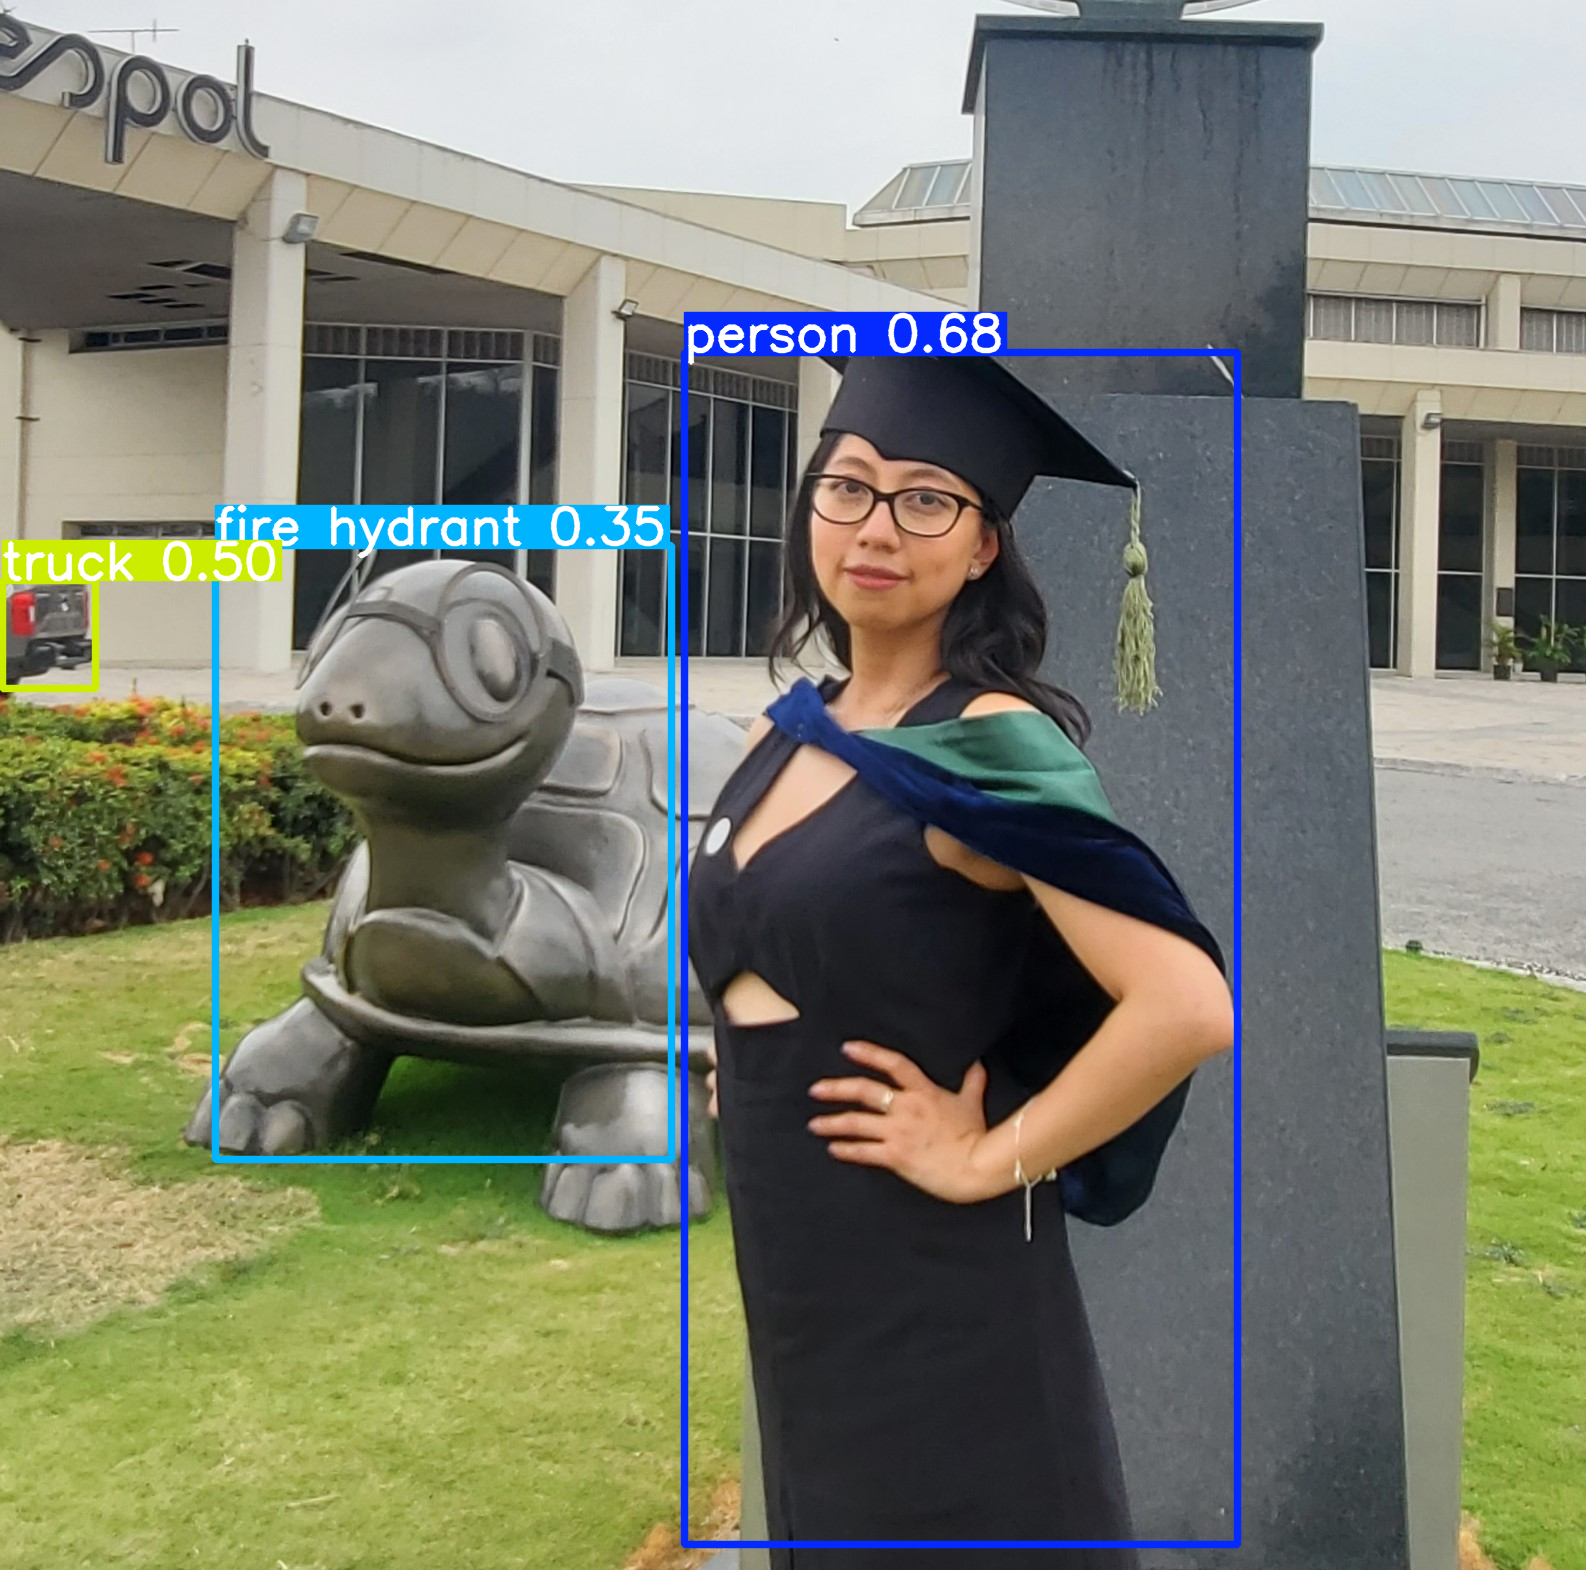

In [2]:
import torch
from matplotlib import pyplot as plt
from PIL import Image
import requests
from io import BytesIO


# Import necessary libraries

# Load the YOLOv5 model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")


# Function to perform inference on an image
def detect_objects(image_path):
    # Load image
    # response = requests.get(image_path)
    img = Image.open(image_path)
    results = model(img)
    results.print()
    results.show()


# Example usage
image_path = "..//assets//graduacion.jpg"
detect_objects(image_path)

In [4]:
!pip install tflite-runtime

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement tflite-runtime (from versions: none)
ERROR: No matching distribution found for tflite-runtime

[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import torch
import shutil



# Clear the cache
torch_cache_dir = torch.hub.get_dir()
shutil.rmtree(torch_cache_dir)


model_f = "..//models//yolov5s-fp16.tflite"


model_f = "..//models//yolov5s-fp16_WHATSAPP.tflite"


model_f = "..//models//yolov5s-fp16_APP.tflite"



model_tflite = torch.hub.load(
    "ultralytics/yolov5", "custom", "..//models//yolov5s-fp16.tflite", force_reload=True
)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\z_tja/.cache\torch\hub\master.zip
YOLOv5  2024-12-9 Python-3.10.8 torch-2.5.1+cpu CPU



Exception: invalid load key, '\x1c'.. Cache may be out of date, try `force_reload=True` or see https://docs.ultralytics.com/yolov5/tutorials/pytorch_hub_model_loading for help.

In [1]:
import tensorflow as tf

model_f = "..//models//yolov5s-fp16.tflite"

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path=model_f)
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Model loaded successfully")

Model loaded successfully


In [19]:
input_details

[{'name': 'serving_default_keras_tensor_121:0',
  'index': 0,
  'shape': array([  1, 640, 640,   3]),
  'shape_signature': array([  1, 640, 640,   3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [18]:
output_details

[{'name': 'StatefulPartitionedCall_1:0',
  'index': 530,
  'shape': array([    1, 25200,    85]),
  'shape_signature': array([    1, 25200,    85]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [15]:
import numpy as np
from PIL import Image, ImageDraw


# Load and preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path).resize(
        (input_details[0]["shape"][2], input_details[0]["shape"][1])
    )
    img = np.array(img, dtype=np.float32)
    img = np.expand_dims(img, axis=0)
    return img


# Set the input tensor
image_path = "..//assets//graduacion.jpg"
input_data = preprocess_image(image_path)
interpreter.set_tensor(input_details[0]["index"], input_data)

# Invoke the interpreter
interpreter.invoke()

# Get the output tensor
output_data = interpreter.get_tensor(output_details[0]["index"])


# Draw the predictions on the image
def draw_predictions(image_path, output_data):
    img = Image.open(image_path)
    draw = ImageDraw.Draw(img)

    # Assuming output_data contains bounding boxes and confidence scores
    for detection in output_data:
        # Extract bounding box coordinates and confidence score
        ymin, xmin, ymax, xmax, confidence = detection[:5]

        print(detection[0])
        ymin, xmin, ymax, xmax = int(ymin), int(xmin), int(ymax), int(xmax)

        # Draw bounding box
        draw.rectangle([(xmin, ymin), (xmax, ymax)], outline="red", width=2)

        # Draw confidence score
        draw.text((xmin, ymin), f"{confidence:.2f}", fill="red")

    img.show()


draw_predictions(image_path, output_data)
# print("Prediction:", output_data)

[1.13275079e-02 2.66679213e-03 2.45224535e-02 8.09650794e-02
 0.00000000e+00 3.22470707e-21 2.75957396e-10 2.82810444e-14
 1.25026361e-11 2.33178615e-10 6.66910320e-12 9.51962731e-10
 2.01211912e-11 1.15531570e-10 1.43576035e-04 8.89543328e-10
 2.38836506e-08 8.29591618e-10 2.96961442e-08 3.07716406e-03
 1.42500445e-09 9.53404630e-12 1.69878139e-11 5.71401060e-09
 5.14556531e-09 2.29796026e-11 1.48076786e-08 3.10310782e-08
 3.04532677e-10 1.87611837e-09 4.29089764e-10 3.00865488e-09
 1.06888919e-07 1.34607747e-09 1.85114519e-08 1.09956227e-06
 6.77001344e-10 5.36264246e-03 4.97110022e-06 7.43100914e-10
 1.39817075e-05 4.24288132e-10 8.97753399e-11 6.37917008e-09
 1.89340876e-10 5.02918818e-09 3.12668647e-09 1.52311344e-07
 1.20439367e-07 1.38064905e-07 2.02878176e-08 3.20676730e-09
 1.93099692e-09 2.12608584e-10 1.59506342e-07 8.19679258e-07
 3.24701261e-07 1.03869183e-07 4.07894305e-08 2.79169594e-08
 6.42068798e-08 1.90896448e-11 3.34537703e-10 2.23713395e-10
 2.33211650e-09 2.361956

TypeError: only size-1 arrays can be converted to Python scalars

In [10]:
!pip install protobuf==3.20.*

Defaulting to user installation because normal site-packages is not writeable
   -------------------------------------- 904.0/904.0 kB 922.4 kB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.22.1
    Uninstalling protobuf-4.22.1:
      Successfully uninstalled protobuf-4.22.1


DEPRECATION: nb-black 1.0.7 has a non-standard dependency specifier black>='19.3'; python_version >= "3.6". pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of nb-black or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.51.3 requires protobuf>=4.21.6, but you have protobuf 3.20.3 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
web3 5.24.0 requires websockets<10,>=9.1, but you have websockets 11.0.3 which is incompatible